In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_html(url):
    return requests.get(url).text

In [3]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / (height_inch / METER_TO_INCH) ** 2

In [4]:
url = 'http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html'
html = get_html(url)

In [5]:
soup = BeautifulSoup(html, 'lxml')
trs = soup.find_all('tr')[1:]

In [6]:
heights = [float(tr.find_all('td')[1].text) for tr in trs]
weights = [float(tr.find_all('td')[2].text) for tr in trs]

In [7]:
df = pd.DataFrame(list(zip(heights, weights)), columns=['heights', 'weights'])
print(df.head())

    heights   weights
0  65.78331  112.9925
1  71.51521  136.4873
2  69.39874  153.0269
3  68.21660  142.3354
4  67.78781  144.2971


### Задание 1

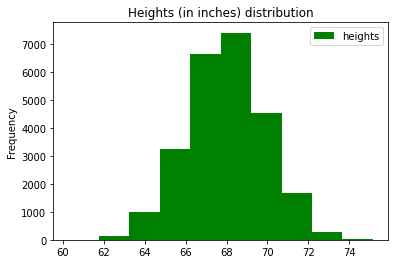

In [8]:
df.plot(y='heights', kind='hist', color='green', title='Heights (in inches) distribution')
plt.show()

### Задание 2

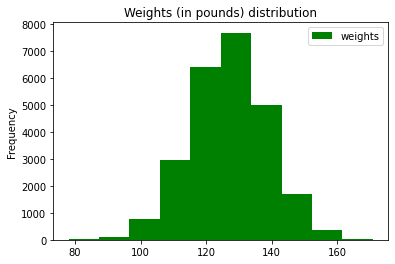

In [9]:
df.plot(y='weights', kind='hist', color='green', title='Weights (in pounds) distribution')
plt.show()

### Задание 3

In [10]:
BMI = [make_bmi(h, w) for h, w in zip(heights, weights)]
df['BMI'] = pd.DataFrame(BMI)

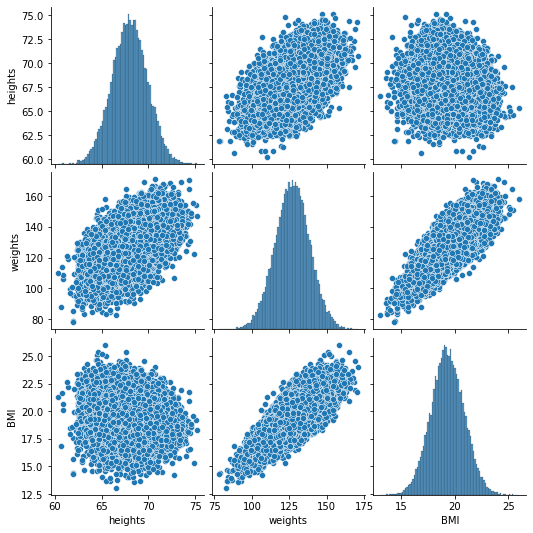

In [11]:
sns.pairplot(df)
plt.show()

### Задание 4

In [12]:
def make_category(weight):
    if np.less(weight, 120):
        return 1
    elif np.greater_equal(weight, 150):
        return 3
    else:
        return 2

In [13]:
df['weight_category'] = df.apply(lambda row: make_category(row['weights']), axis=1)
print(df.head())

    heights   weights        BMI  weight_category
0  65.78331  112.9925  18.357573                1
1  71.51521  136.4873  18.762577                2
2  69.39874  153.0269  22.338895                3
3  68.21660  142.3354  21.504526                2
4  67.78781  144.2971  22.077581                2


Text(0, 0.5, 'Рост')

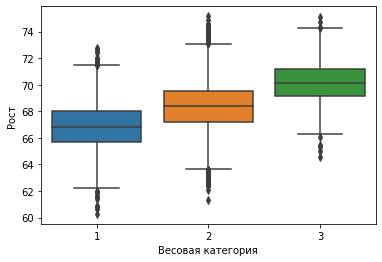

In [14]:
sns.boxplot(y='heights', x='weight_category', data=df)
plt.xlabel('Весовая категория')
plt.ylabel('Рост')

### Задание 5

Text(0.5, 1.0, 'Зависимость роста от веса')

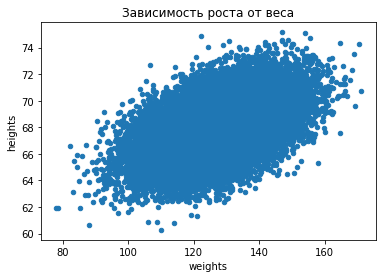

In [15]:
df.plot(x='weights', y='heights', kind='scatter')
plt.title('Зависимость роста от веса')

### Задание 6

In [16]:
def error(w0, w1):
    result = 0
    for i in range(df['heights'].count()):
        result += (df['heights'][i] - (w0 + w1 * df['weights'][i])) ** 2
    return result

### Задание 7

In [17]:
max_weight = df['weights'].max()
min_weight = df['weights'].min()
X = np.linspace(min_weight, max_weight, num=2)

In [18]:
Y1 = [60 + 0.05*x for x in X]
Y2 = [50 + 0.16*x for x in X]

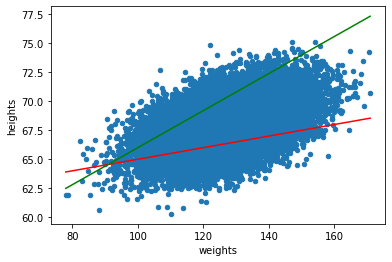

In [19]:
df.plot(x='weights', y='heights', kind='scatter')
plt.plot(X, Y1, color='r')
plt.plot(X, Y2, color='g')

### Задание 8

In [20]:
W1 = np.linspace(-5, 5, num=10)
ERROR = [error(50, w1) for w1 in W1]

Text(0.5, 1.0, 'Зависимость функции ошибки от w1 при w0 = 50')

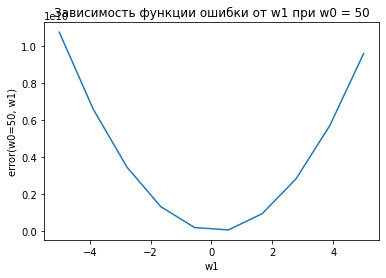

In [21]:
plt.plot(W1, ERROR)
plt.xlabel('w1')
plt.ylabel('error(w0=50, w1)')
plt.title('Зависимость функции ошибки от w1 при w0 = 50')

### Задание 9

In [22]:
from scipy.optimize import minimize_scalar

In [23]:
w1_opt = minimize_scalar(lambda w1: error(50, w1))
Y3 = Y2 = [50 + w1_opt.x * x for x in X]

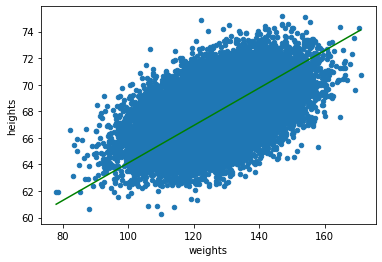

In [24]:
df.plot(x='weights', y='heights', kind='scatter')
plt.plot(X, Y3, color='g')